# Axial MRI Brain Tumor Images Classification Using Simple CNN Archeticure 

This Jupyter Notebook focuses on the classification of axial MRI brain tumor images utilizing Simple Convolutional Neural Network (CNN) architecture, using **TensorFlow** . We aim to build a model that can effectively distinguish between **glioma, meningioma, pituitary tumor, and non-tumor cases.** Through deep learning techniques, we aim to contribute to medical image analysis, assisting in early tumor detection and diagnosis for improved patient care.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os 
import cv2

In [15]:
imgsize = 180 
def load_data(data_dir, img_size=(imgsize, imgsize)):
    X = []
    y = []
    class_names = sorted(os.listdir(data_dir))
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(class_names.index(class_name))
    
    X = np.array(X)
    y = np.array(y)
    y = to_categorical(y, num_classes=len(class_names))
    
    return X, y, class_names

train_data_dir = 'Data/Training'
test_data_dir = 'Data/Testing'

In [16]:
train_data_dir = 'Data\Training'
test_data_dir = 'Data\Testing'

train_X, train_y, class_names = load_data(train_data_dir)
test_X, test_y, _ = load_data(test_data_dir)

print("Train data shape:", train_X.shape)
print("Train label shape:", train_y.shape)
print("Test data shape:", test_X.shape)
print("Test label shape:", test_y.shape)

Train data shape: (1690, 180, 180, 3)
Train label shape: (1690, 4)
Test data shape: (750, 180, 180, 3)
Test label shape: (750, 4)


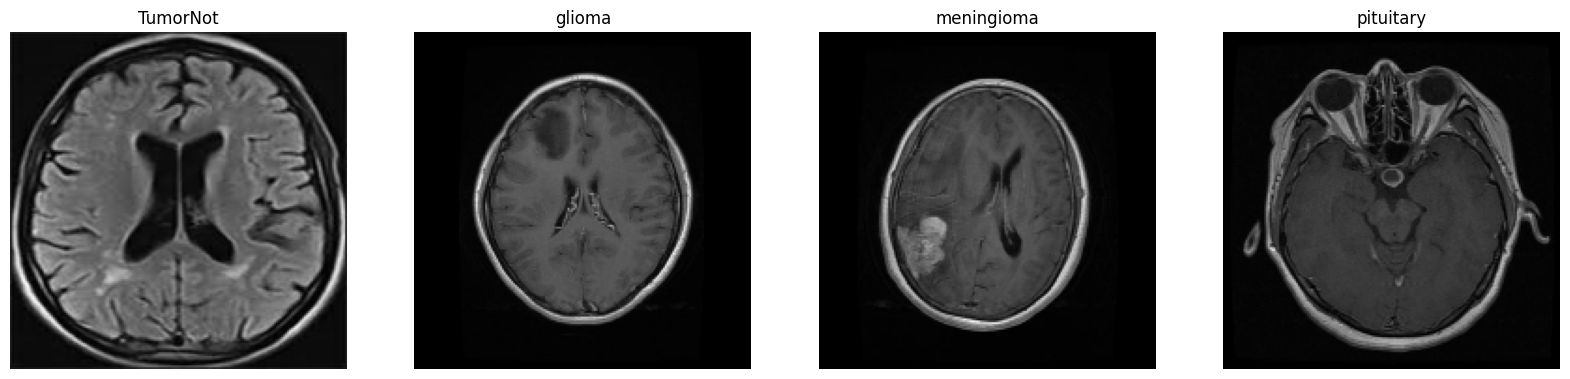

In [23]:
def display_examples_of_each_class():
    num_classes = len(class_names)
    fig, axes = plt.subplots(1, num_classes, figsize=(20, 5))

    for i in range(num_classes):
        # Pick a random index to display a training image from the selected class
        random_index = np.random.choice(np.where(train_y[:, i] == 1)[0])

        # Display the image
        axes[i].imshow(train_X[random_index])
        axes[i].set_title(class_names[i])
        axes[i].axis("off")

    plt.show()

display_examples_of_each_class()

In [5]:
#Splitting Data
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

In [6]:
#Model 
num_classes = len(class_names)
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])


In [7]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

In [9]:
history = model.fit(train_X, train_y, epochs=10, validation_data=(val_X, val_y))


Epoch 1/10


c:\Users\mwahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


43/43 [==============================] - 26s 574ms/step - loss: 17.0814 - accuracy: 0.5932 - val_loss: 0.6094 - val_accuracy: 0.8018
Epoch 2/10
43/43 [==============================] - 25s 592ms/step - loss: 0.4193 - accuracy: 0.8587 - val_loss: 0.4307 - val_accuracy: 0.8757
Epoch 3/10
43/43 [==============================] - 23s 543ms/step - loss: 0.2730 - accuracy: 0.9098 - val_loss: 0.2933 - val_accuracy: 0.8964
Epoch 4/10
43/43 [==============================] - 23s 544ms/step - loss: 0.1414 - accuracy: 0.9578 - val_loss: 0.3317 - val_accuracy: 0.9201
Epoch 5/10
43/43 [==============================] - 24s 548ms/step - loss: 0.0956 - accuracy: 0.9682 - val_loss: 0.3588 - val_accuracy: 0.9172
Epoch 6/10
43/43 [==============================] - 24s 549ms/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.4080 - val_accuracy: 0.9408
Epoch 7/10
43/43 [==============================] - 23s 545ms/step - loss: 0.0348 - accuracy: 0.9911 - val_loss: 0.3801 - val_accuracy: 0.9438
Epoch 8/1

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Accuracy')

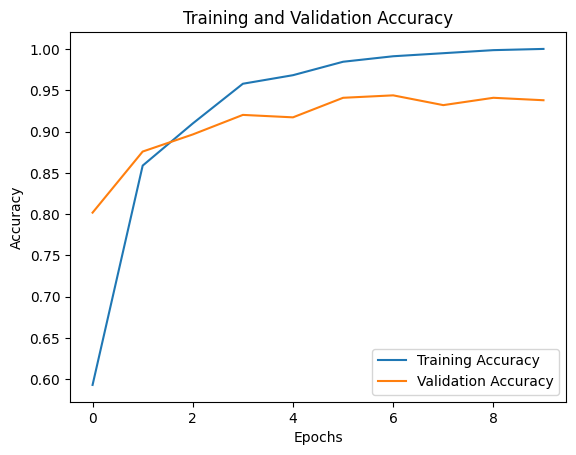

In [12]:
#Accuracy of Training and Validation Data
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

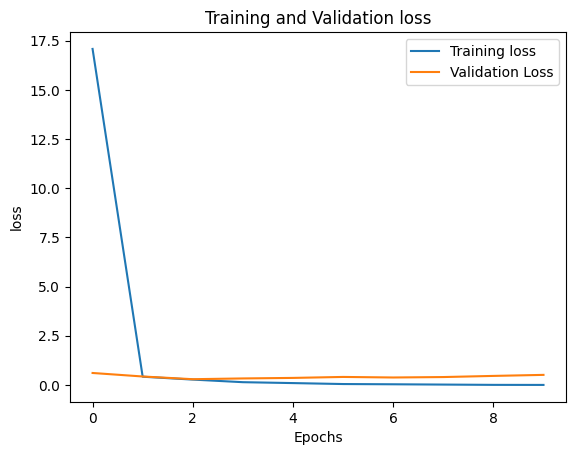

In [13]:
#Loss of Training and Validation Data
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('loss')

In [17]:
#Training Data Accuracy
img_height = 180
img_width = 180
predictions = model.predict(test_X)
image_path = 'Data\Training\TumorNot\Tr-no_0015.jpg'
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img.show()
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to Notumor with a 47.54 percent confidence.


In [38]:
#Testing Data Accuracy
img_height = 180
img_width = 180
predictions = model.predict(test_X)
image_path = 'Data\Testing\meningioma\Te-me_0074.jpg'
img = tf.keras.utils.load_img(
    image_path, target_size=(img_height, img_width)
)
img.show()
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 26ms/step
This image most likely belongs to meningioma with a 47.54 percent confidence.


In [41]:
#Model Overall Accuracy
loss, accuracy = model.evaluate(test_X, test_y)

overall_accuracy = accuracy * 100
overall_loss = loss * 100
print(f"Overall Accuracy: {overall_accuracy:.2f}%")
print(f"Overall Loss: {overall_loss:.2f}%")

24/24 [==============================] - 3s 107ms/step - loss: 0.3609 - accuracy: 0.9440
Overall Accuracy: 94.40%
Overall Loss: 36.09%


24/24 [==============================] - 3s 104ms/step


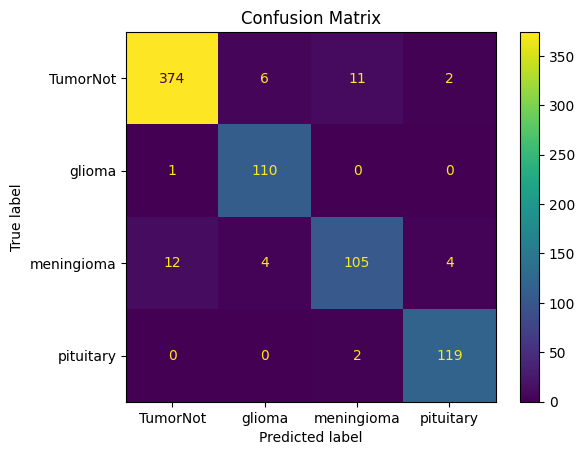

In [43]:
predictions = model.predict(test_X)
predicted_class_indices = np.argmax(predictions, axis=1)

# Get the true labels for the test data
true_labels = np.argmax(test_y, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_class_indices)

# Get class names from the class_names variable obtained during data loading
class_names = sorted(os.listdir(train_data_dir))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()

24/24 [==============================] - 3s 121ms/step


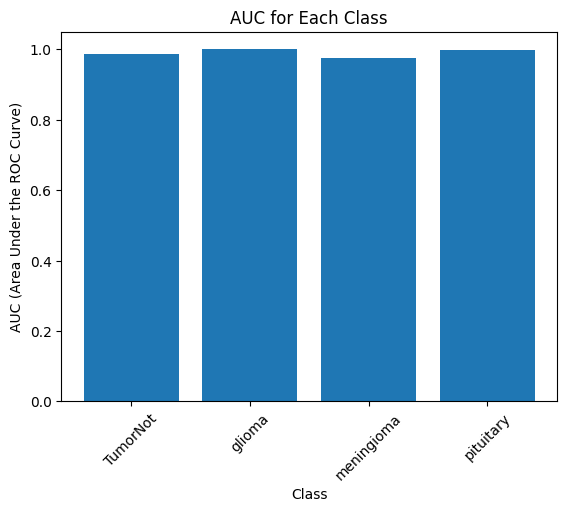

AUC for Each Class:
Class 0: 98.6465%
Class 1: 99.9323%
Class 2: 97.4592%
Class 3: 99.8542%

Average AUC: 98.9730% 


In [58]:
predictions = model.predict(test_X)

# Get the true labels for the test data
true_labels = np.argmax(test_y, axis=1)

# Initialize a list to store AUC values for each class
all_auc = []

# Compute AUC for each class
for i in range(num_classes):  # num_classes is the number of classes in your dataset
    auc = roc_auc_score(true_labels == i, predictions[:, i])
    all_auc.append(auc)

# Plot the AUC values for each class
plt.figure()
plt.bar(range(num_classes), all_auc)
plt.xticks(range(num_classes), class_names, rotation=45)
plt.xlabel('Class')
plt.ylabel('AUC (Area Under the ROC Curve)')
plt.title('AUC for Each Class')
plt.show()

average_auc = np.mean(all_auc)

print("AUC for Each Class:")
for i, auc in enumerate(all_auc):
    print(f"Class {i}: {auc*100:.4f}%")

print(f"\nAverage AUC: {average_auc* 100:.4f}% ")

In [45]:
model.save('axial.h5')